<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_2_8_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_2.8'

In [4]:
os.listdir(base_path)

['data_add_delta_2.8_n20.csv',
 'data_add_delta_2.8_n30.csv',
 'data_add_delta_2.8_n60.csv',
 'data_add_delta_2.8_n120.csv',
 'data_add_delta_2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.8_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,37.489935,30.860132,21.392958,21969.177743,22068.920767,43775.621015,-21706.700248
1,0.0,1.0,37.900544,58.504065,68.664496,-2726.748518,-2551.679414,-23589.358042,21037.678628
2,0.0,2.0,87.593033,21.241037,47.441774,-6956.987706,-6790.711862,2537.796235,-9328.508098
3,0.0,3.0,98.216857,82.743114,43.681410,-454057.003619,-453822.362238,-109724.291699,-344098.070538
4,0.0,4.0,73.952398,88.836999,37.886121,7871.498105,8082.173623,-95098.833853,103181.007475
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,57.119519,51.443529,27.823509,-4583.910623,-4437.524066,59068.180261,-63505.704327
59996,999.0,56.0,72.351748,49.220878,78.295983,149130.733190,149340.601799,-37602.470903,186943.072702
59997,999.0,57.0,34.807520,64.623783,30.844892,32767.513318,32907.789513,110042.035917,-77134.246404
59998,999.0,58.0,65.490258,52.830330,51.520095,-46589.028682,-46409.188000,16306.752244,-62715.940244


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,37.489935,30.860132,21.392958,21969.177743,22068.920767,43775.621015,-21706.700248
1,0.0,1.0,37.900544,58.504065,68.664496,-2726.748518,-2551.679414,-23589.358042,21037.678628
2,0.0,2.0,87.593033,21.241037,47.441774,-6956.987706,-6790.711862,2537.796235,-9328.508098
3,0.0,3.0,98.216857,82.743114,43.681410,-454057.003619,-453822.362238,-109724.291699,-344098.070538
4,0.0,4.0,73.952398,88.836999,37.886121,7871.498105,8082.173623,-95098.833853,103181.007475
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,57.119519,51.443529,27.823509,-4583.910623,-4437.524066,59068.180261,-63505.704327
59996,999.0,56.0,72.351748,49.220878,78.295983,149130.733190,149340.601799,-37602.470903,186943.072702
59997,999.0,57.0,34.807520,64.623783,30.844892,32767.513318,32907.789513,110042.035917,-77134.246404
59998,999.0,58.0,65.490258,52.830330,51.520095,-46589.028682,-46409.188000,16306.752244,-62715.940244


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...          y_hat          e_hat
rep   index                        ...                              
0.0   0.0    37.489935  30.860132  ...   43775.621015  -21706.700248
      1.0    37.900544  58.504065  ...  -23589.358042   21037.678628
      2.0    87.593033  21.241037  ...    2537.796235   -9328.508098
      3.0    98.216857  82.743114  ... -109724.291699 -344098.070538
      4.0    73.952398  88.836999  ...  -95098.833853  103181.007475
...                ...        ...  ...            ...            ...
999.0 55.0   57.119519  51.443529  ...   59068.180261  -63505.704327
      56.0   72.351748  49.220878  ...  -37602.470903  186943.072702
      57.0   34.807520  64.623783  ...  110042.035917  -77134.246404
      58.0   65.490258  52.830330  ...   16306.752244  -62715.940244
      59.0   49.286070  46.415970  ...   53575.515705  -32662.865390

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...          y_hat          e_hat
rep   index                        ...                              
0.0   0.0    37.489935  30.860132  ...   43775.621015  -21706.700248
      1.0    37.900544  58.504065  ...  -23589.358042   21037.678628
      2.0    87.593033  21.241037  ...    2537.796235   -9328.508098
      3.0    98.216857  82.743114  ... -109724.291699 -344098.070538
      4.0    73.952398  88.836999  ...  -95098.833853  103181.007475
...                ...        ...  ...            ...            ...
999.0 55.0   57.119519  51.443529  ...   59068.180261  -63505.704327
      56.0   72.351748  49.220878  ...  -37602.470903  186943.072702
      57.0   34.807520  64.623783  ...  110042.035917  -77134.246404
      58.0   65.490258  52.830330  ...   16306.752244  -62715.940244
      59.0   49.286070  46.415970  ...   53575.515705  -32662.865390

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,37.489935,30.860132,21.392958,21969.177743,22068.920767,43775.621015,-21706.700248
1,0.0,1.0,37.900544,58.504065,68.664496,-2726.748518,-2551.679414,-23589.358042,21037.678628
2,0.0,2.0,87.593033,21.241037,47.441774,-6956.987706,-6790.711862,2537.796235,-9328.508098
3,0.0,3.0,98.216857,82.743114,43.681410,-454057.003619,-453822.362238,-109724.291699,-344098.070538
4,0.0,4.0,73.952398,88.836999,37.886121,7871.498105,8082.173623,-95098.833853,103181.007475
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,57.119519,51.443529,27.823509,-4583.910623,-4437.524066,59068.180261,-63505.704327
59996,999.0,56.0,72.351748,49.220878,78.295983,149130.733190,149340.601799,-37602.470903,186943.072702
59997,999.0,57.0,34.807520,64.623783,30.844892,32767.513318,32907.789513,110042.035917,-77134.246404
59998,999.0,58.0,65.490258,52.830330,51.520095,-46589.028682,-46409.188000,16306.752244,-62715.940244


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...          y_hat          e_hat
rep   index                        ...                              
0.0   0.0    37.489935  30.860132  ...   43775.621015  -21706.700248
      1.0    37.900544  58.504065  ...  -23589.358042   21037.678628
      2.0    87.593033  21.241037  ...    2537.796235   -9328.508098
      3.0    98.216857  82.743114  ... -109724.291699 -344098.070538
      4.0    73.952398  88.836999  ...  -95098.833853  103181.007475
...                ...        ...  ...            ...            ...
999.0 55.0   57.119519  51.443529  ...   59068.180261  -63505.704327
      56.0   72.351748  49.220878  ...  -37602.470903  186943.072702
      57.0   34.807520  64.623783  ...  110042.035917  -77134.246404
      58.0   65.490258  52.830330  ...   16306.752244  -62715.940244
      59.0   49.286070  46.415970  ...   53575.515705  -32662.865390

[60000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

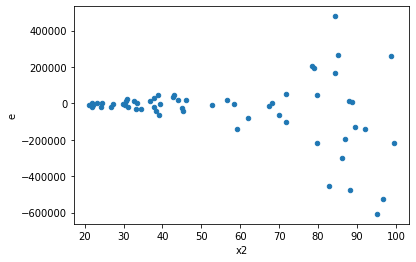

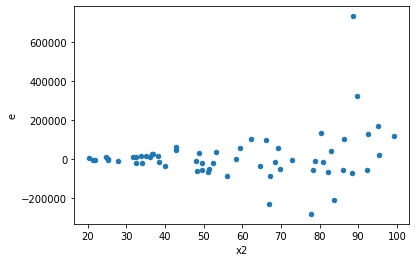

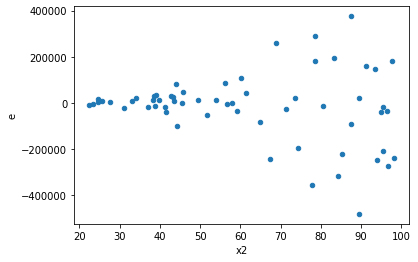

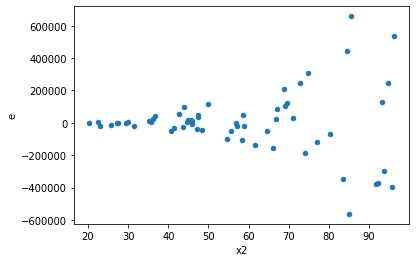

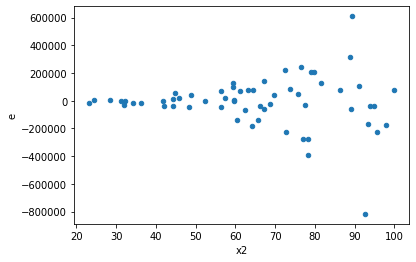

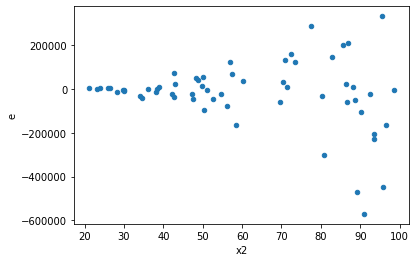

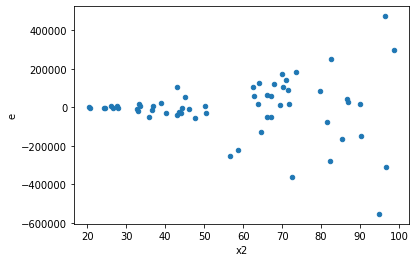

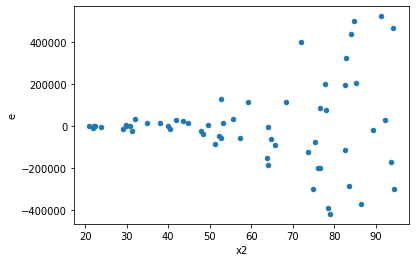

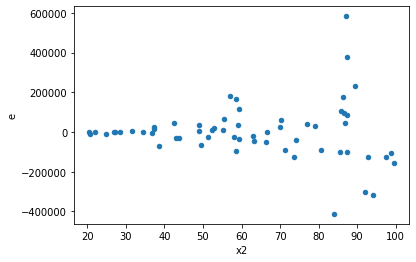

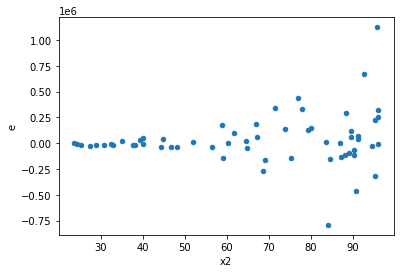

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,21.0,21.0,1434447826754.2744,11674294826.124174,71722391337.71371,583714741.3062087,122.87233174412695,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
1.0,21.0,21.0,541777148220.3606,14692322935.856518,27088857411.01803,734616146.7928259,36.874846175491896,7.65609797781508e-12,0.999999999996172,Reject005=0 : Heteroscedasticity
2.0,21.0,21.0,1025401170323.405,25412315337.728256,51270058516.17025,1270615766.8864129,40.35056061188761,3.105959933691338e-12,0.999999999998447,Reject005=0 : Heteroscedasticity
3.0,21.0,21.0,1919480952933.9958,21469032042.013912,95974047646.6998,1073451602.1006956,89.40696297707598,8.881784197001252e-16,0.9999999999999996,Reject005=0 : Heteroscedasticity
4.0,21.0,21.0,1751468486377.1846,34090842640.51689,87573424318.85922,1704542132.0258446,51.3765090774133,2.715605518233133e-13,0.9999999999998642,Reject005=0 : Heteroscedasticity
5.0,21.0,21.0,764606885386.5652,17098954797.462404,38230344269.32826,854947739.8731202,44.71658615648471,1.1048939541069558e-12,0.9999999999994476,Reject005=0 : Heteroscedasticity
6.0,21.0,21.0,807099677337.8496,21732648031.42178,40354983866.89248,1086632401.571089,37.137659256751334,7.1314065763772305e-12,0.9999999999964343,Reject005=0 : Heteroscedasticity
7.0,21.0,21.0,1807580022797.214,13233592174.880291,90379001139.8607,661679608.7440145,136.5902771454845,2.220446049250313e-16,0.9999999999999999,Reject005=0 : Heteroscedasticity
8.0,21.0,21.0,957728246020.8534,20139724048.716057,47886412301.04267,1006986202.4358028,47.554189109254956,5.937472735695337e-13,0.9999999999997031,Reject005=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,1434447826754.2744,11674294826.124174,71722391337.71371,583714741.3062087,122.87233174412695,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
1.0,21.0,21.0,541777148220.3606,14692322935.856518,27088857411.01803,734616146.7928259,36.874846175491896,7.65609797781508e-12,Reject005=0 : Heteroscedasticity
2.0,21.0,21.0,1025401170323.405,25412315337.728256,51270058516.17025,1270615766.8864129,40.35056061188761,3.105959933691338e-12,Reject005=0 : Heteroscedasticity
3.0,21.0,21.0,1919480952933.9958,21469032042.013912,95974047646.6998,1073451602.1006956,89.40696297707598,8.881784197001252e-16,Reject005=0 : Heteroscedasticity
4.0,21.0,21.0,1751468486377.1846,34090842640.51689,87573424318.85922,1704542132.0258446,51.3765090774133,2.715605518233133e-13,Reject005=0 : Heteroscedasticity
5.0,21.0,21.0,764606885386.5652,17098954797.462404,38230344269.32826,854947739.8731202,44.71658615648471,1.1048939541069558e-12,Reject005=0 : Heteroscedasticity
6.0,21.0,21.0,807099677337.8496,21732648031.42178,40354983866.89248,1086632401.571089,37.137659256751334,7.1314065763772305e-12,Reject005=0 : Heteroscedasticity
7.0,21.0,21.0,1807580022797.214,13233592174.880291,90379001139.8607,661679608.7440145,136.5902771454845,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
8.0,21.0,21.0,957728246020.8534,20139724048.716057,47886412301.04267,1006986202.4358028,47.554189109254956,5.937472735695337e-13,Reject005=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64